# Making plots

This notebook is a brief introduction to making plots in R. Below, we are going to cover "base" graphics, that comes built-in with R. There are more elaborate systems such as the [ggplot2](https://ggplot2.tidyverse.org/) system that are also useful, but will not be covered here.

Below, we will cover making plots where there are one or two variables of interest.  This is typically the first step in your data analysis after data entry.

## Setup

First we set the plot size for this notebook.  In other formats, such as HTML, or PDF, you may have to make other modifications like this.

In [1]:
# set plot size
options(repr.plot.width=8, repr.plot.height=8)

For learning about plots, we will first read in the familiar Agren data using the online URL as before.

In [2]:
agren <- read.csv("https://raw.githubusercontent.com/sens/smalldata/master/arabidopsis/agren2013.csv")
head(agren)

it09      it10      it11      sw09      sw10     sw11      id flc
1 19.761589 24.176136 15.677778  5.664430 21.48045  4.477778 1  1  
2  6.288462  1.774011  3.238889  9.543046 22.12222  7.766667 2  2  
3 12.034024 12.460451 10.600962 11.803846 23.04867 14.871157 3  2  
4 20.125339 14.116901 12.903503  7.442628 22.58344  8.193703 6  1  
5 15.127751 13.292528 15.064592  6.896960 22.14041  8.489102 7  1  
6 19.209132 13.954902 12.986849  8.395358 25.56119  8.080184 8  1

## Histogram

Let us begin with a very familiar plot, the histogram. We focus on visualizing fitness in Sweden in 2011.

Most plot commands in R have reasonable defaults and work out the box.  The command for making histograms is `hist` and so we try this:

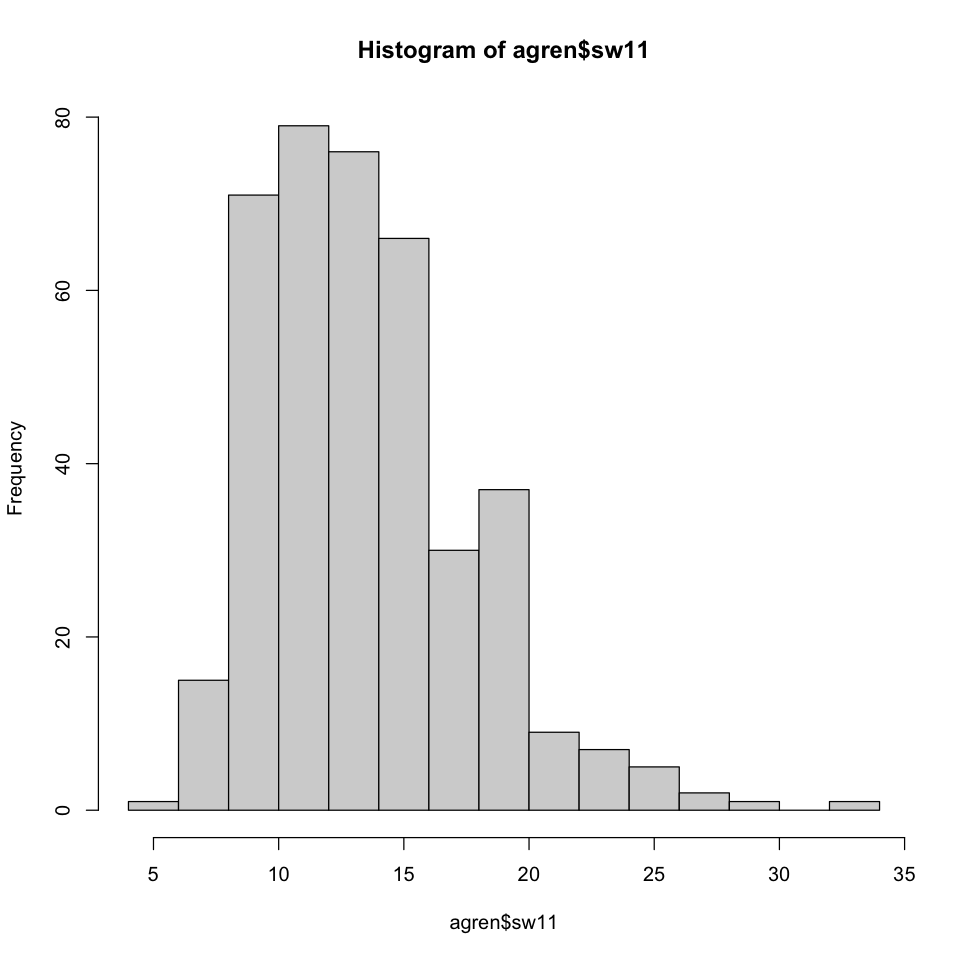

In [3]:
hist(agren$sw11)

This is okay except that the title at the top and the X-axis label are not helpful.  We change the title of the histogram using the `main` option and change the X-axis label using `xlab`.

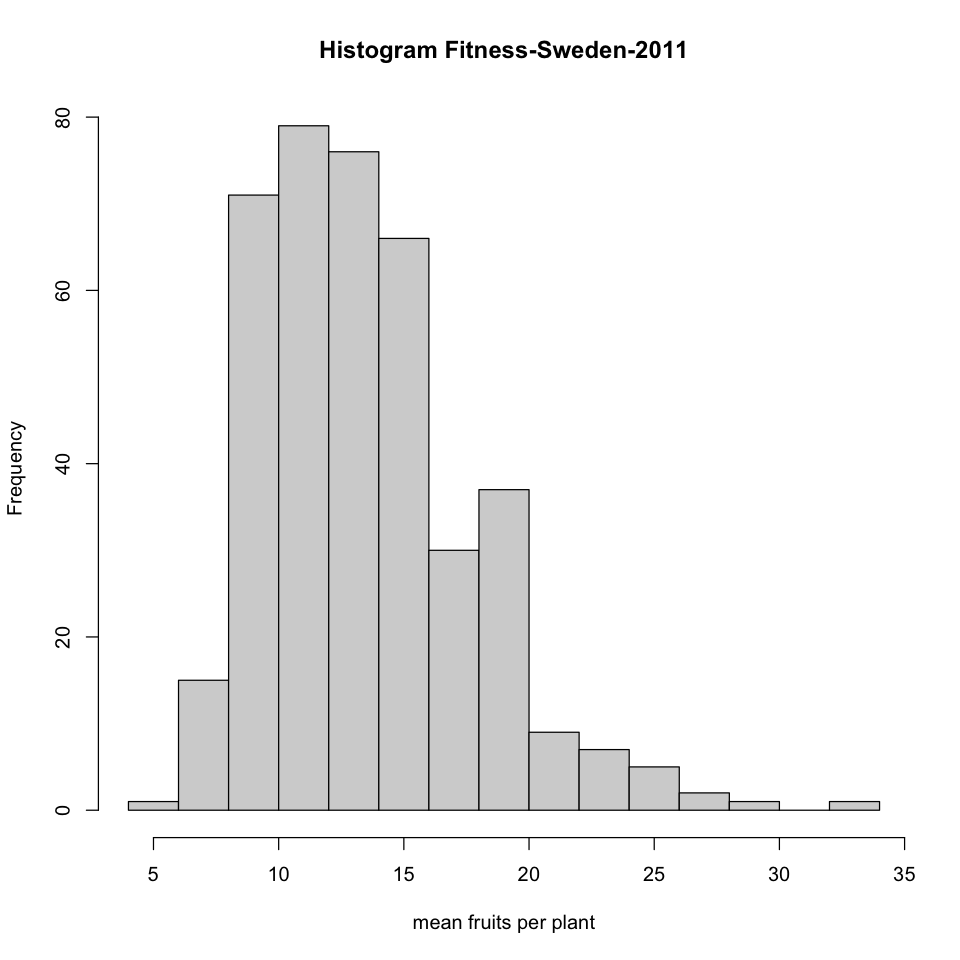

In [4]:
hist(agren$sw11,main="Histogram Fitness-Sweden-2011",xlab="mean fruits per plant")

Let us now try changing the number of bins.  We use the `nclass` option as follows.

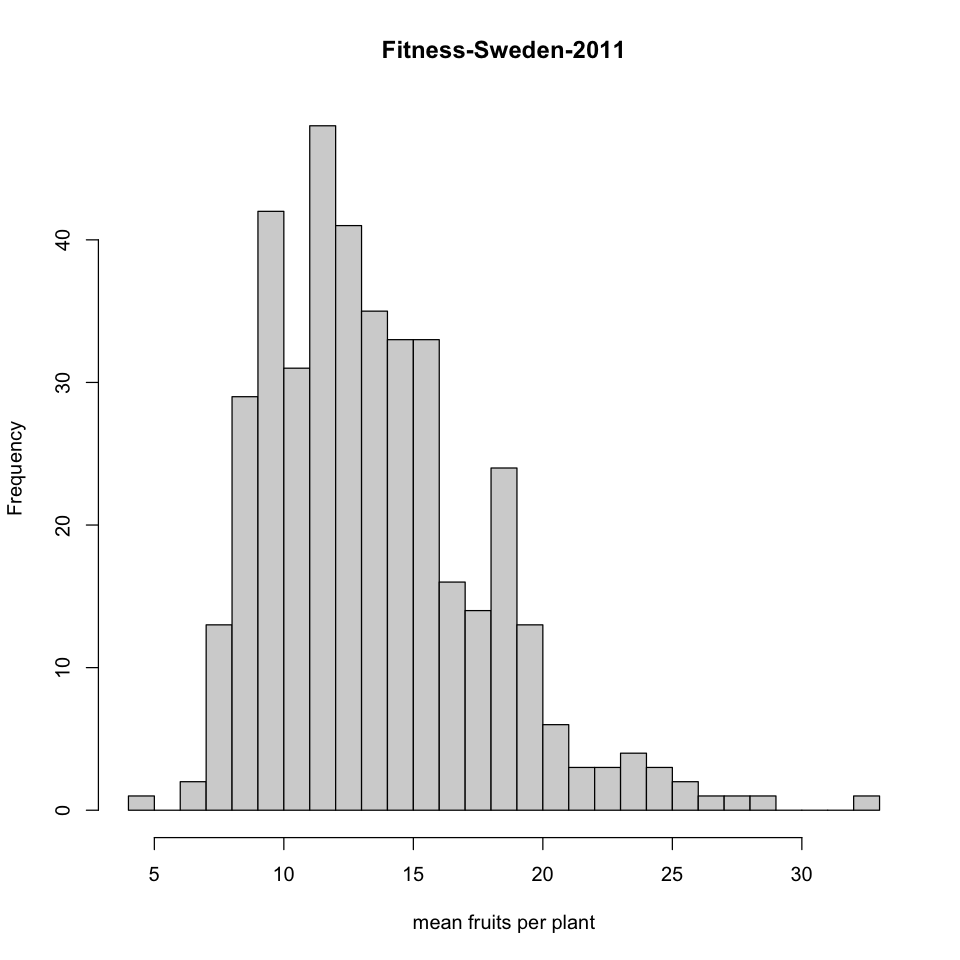

In [5]:
hist(agren$sw11,main="Fitness-Sweden-2011",xlab="mean fruits per plant",nclass=20)

If we want to change the Y-axis label, we use the `ylab` option. We can also plot the histogram on the log2 scale by applying the log2 function to the data vector.

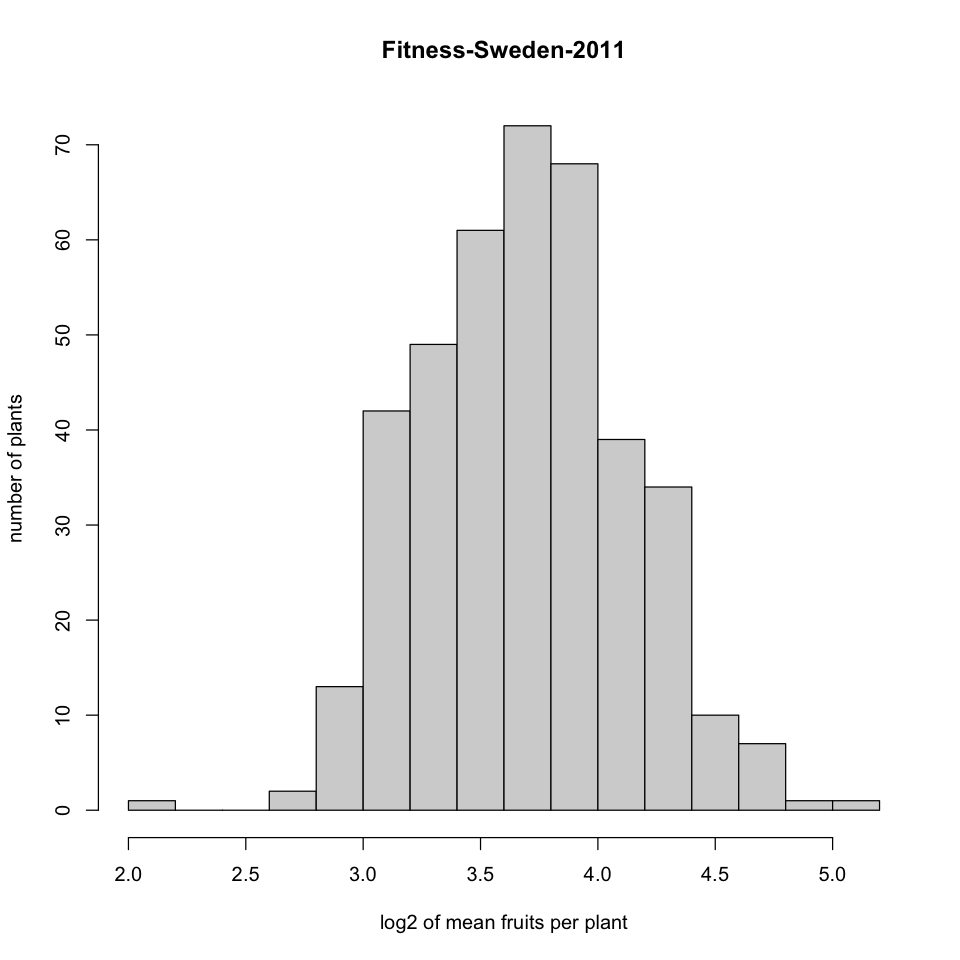

In [6]:
hist(log2(agren$sw11),main="Fitness-Sweden-2011",xlab="log2 of mean fruits per plant",
     nclass=20,ylab="number of plants")

## Stem and leaf plot

Histograms are very useful, but it bins the data, and individual data points are aggregated for visualization. Sometimes we just want to see all the data. The sten and leaf plot is helpful in such scenarios.  Here is a stem and leaf plot for the fitness data.  We use the `scale` option to stretch the length of the plot.

Below, you can see every data point in the dataset.  For example, the smallest value is 4.5, the next largest point is 6.6, followed by 6.9.  The largest value is 32.2.  It also bins the data, and prints them out on the same line generating a sideways histogram.

In [7]:
stem(agren$sw11,scale=2)


  The decimal point is at the |

   4 | 5
   5 | 
   6 | 69
   7 | 125566777899
   8 | 00111112334444444556677788999
   9 | 000000111111222233333444445555566677777999
  10 | 000011111222333334555666678889
  11 | 0000111111222222223333444555556666777888888999999
  12 | 00112222233334444444555556667777788899999
  13 | 0000011222333334555556666788888999
  14 | 00000112222223333444455556677888999
  15 | 001123333334444555555677789999999
  16 | 0112233555666799
  17 | 22334457788
  18 | 00001112233344455677888899
  19 | 0012335777899
  20 | 0012258
  21 | 555
  22 | 569
  23 | 1777
  24 | 349
  25 | 27
  26 | 5
  27 | 1
  28 | 5
  29 | 
  30 | 
  31 | 
  32 | 2



We can control the horizontal width of the plot using the `width` argument.  It contols the maximum number of characters.  If we make the plot shorter (vertically), we have to allow for a greater width.

In [8]:
stem(agren$sw11,scale=1,width=100)


  The decimal point is at the |

   4 | 5
   6 | 69125566777899
   8 | 00111112334444444556677788999000000111111222233333444445555566677777999
  10 | 0000111112223333345556666788890000111111222222223333444555556666777888888999999
  12 | 001122222333344444445555566677777888999990000011222333334555556666788888999
  14 | 00000112222223333444455556677888999001123333334444555555677789999999
  16 | 011223355566679922334457788
  18 | 000011122333444556778888990012335777899
  20 | 0012258555
  22 | 5691777
  24 | 34927
  26 | 51
  28 | 5
  30 | 
  32 | 2



## Dotplot

The dotplot is another way to see all individual data points, this time in a plot (instead of a listing, as in a stem and leaf plot).  The dotplot plots each point in a separate row (X-axis), and the data value is on the Y-axis.

In the plot below, we have tweaked the defaults a bit (in addition to the title and the X-axis label), by changing the plotting character (`pch`) and the size of the plotting character (`pt.cex`).  See the help for the function `points` to see the list of all plotting characters possible.

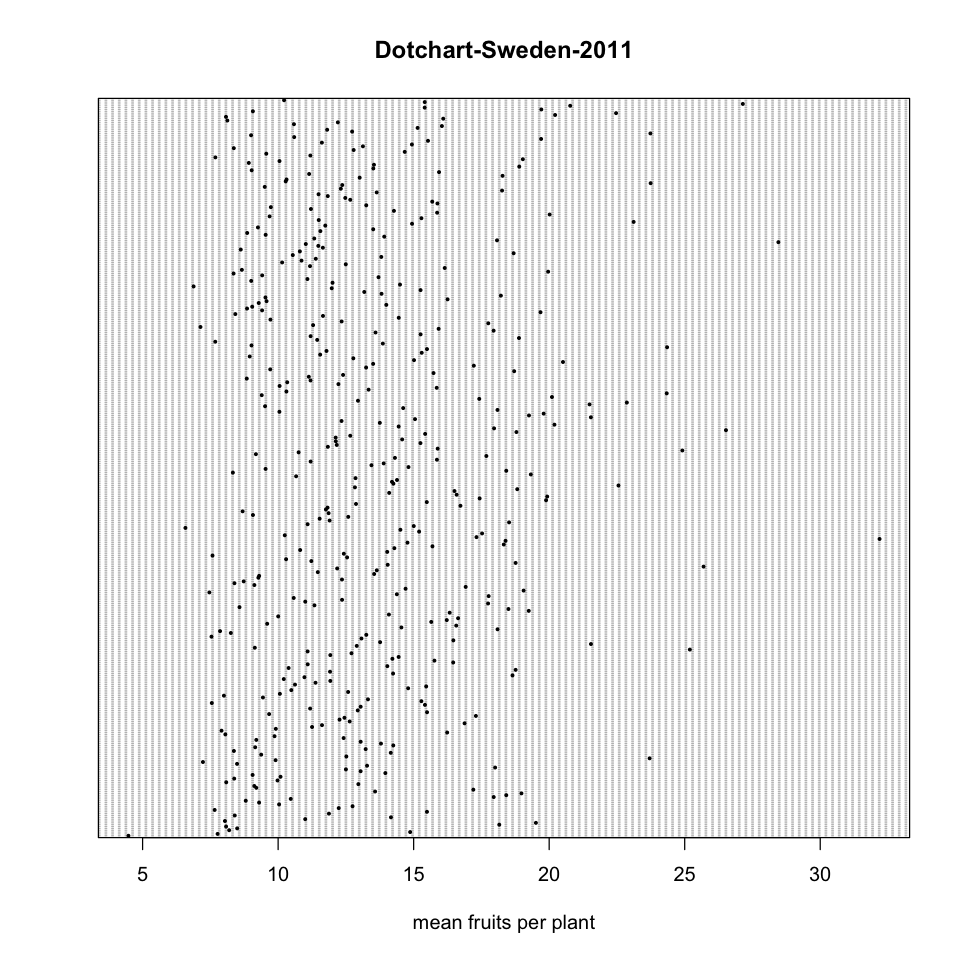

In [9]:
dotchart(agren$sw11,pch=19,pt.cex=0.3,
         main="Dotchart-Sweden-2011",xlab="mean fruits per plant")

We can split the points along the Y-axis (rows) by a grouping variable (`groups`).  We can try splitting by FLC genotype as follows.

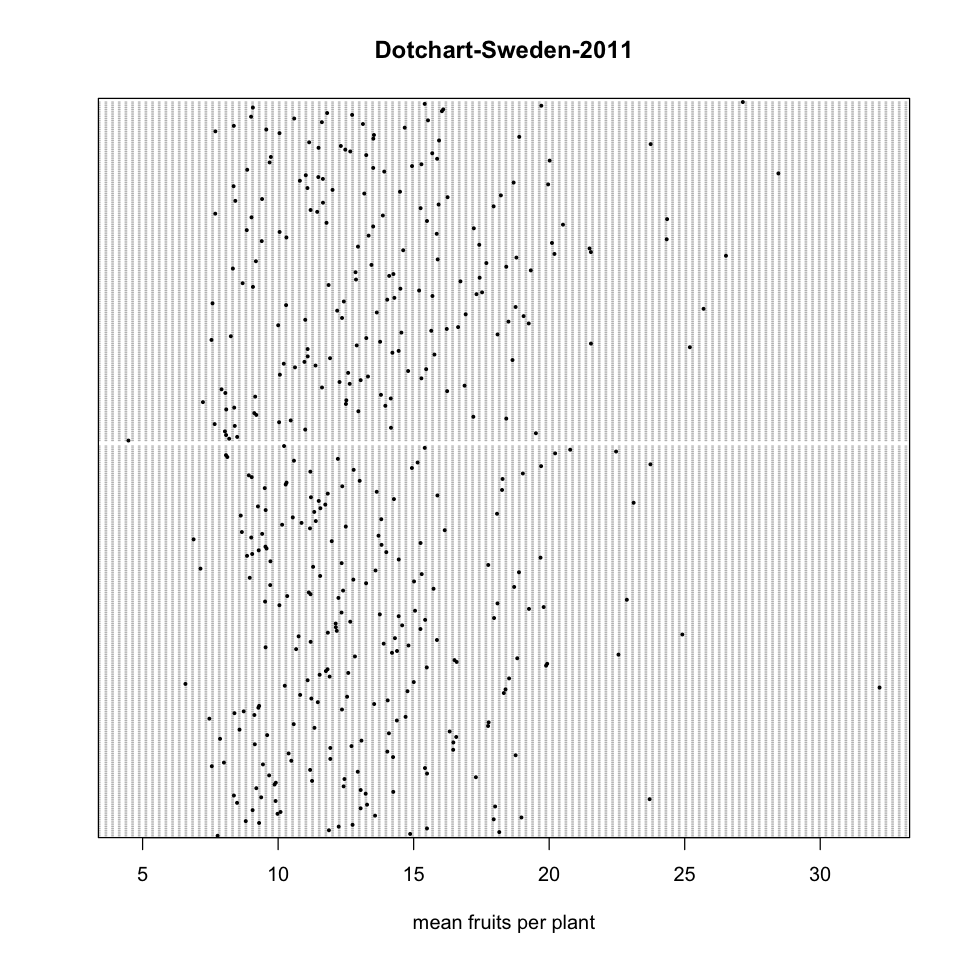

In [10]:
dotchart(agren$sw11,groups=agren$flc,pch=19,pt.cex=0.3,
         main="Dotchart-Sweden-2011",xlab="mean fruits per plant")

To make things a bit clearer, we can use color to separate the points.  We use the `col` option to color the points.  To simplify matters, we get the colors we want ("salmon" and "seagreen") in a vector, and ask the function to use the color of the point according to FLC genotype.

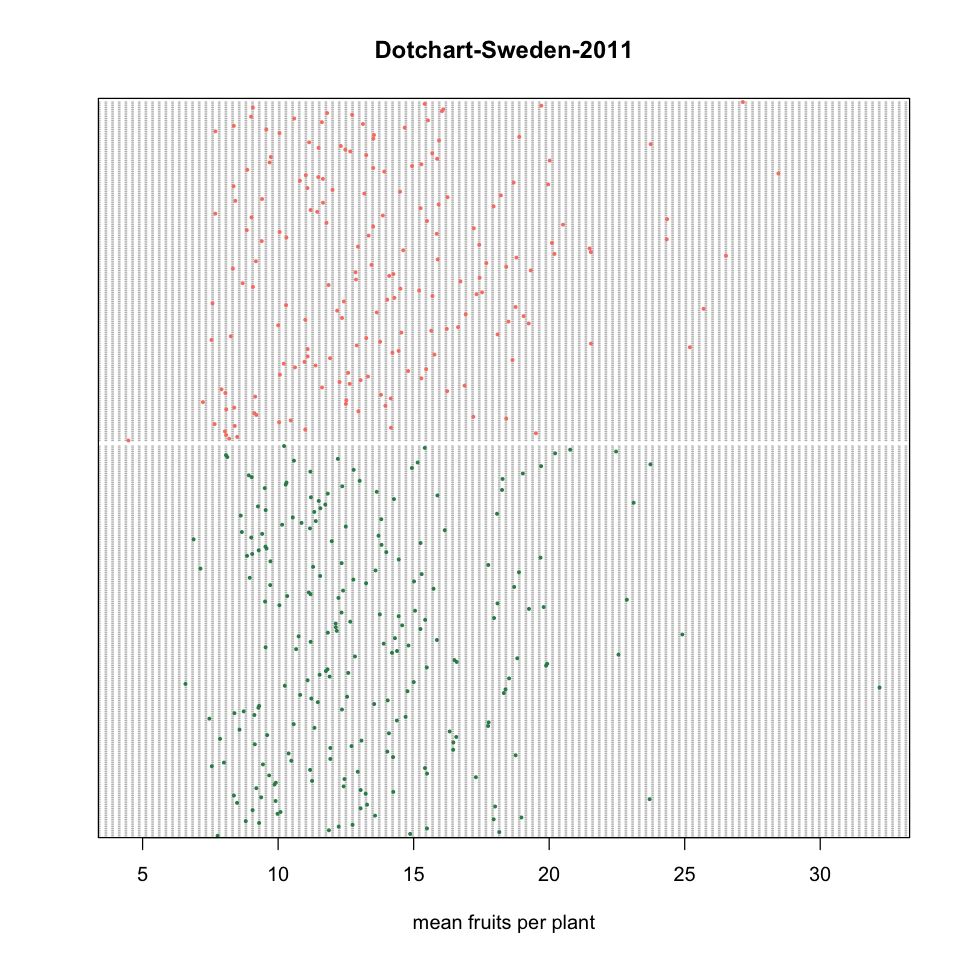

In [11]:
# use colors() to get a list of system colors
mycolors <- c("salmon","seagreen")
dotchart(agren$sw11,groups=agren$flc,pch=19,pt.cex=0.3,
         main="Dotchart-Sweden-2011",
         xlab="mean fruits per plant",
         col=mycolors[agren$flc])

If we want to plot two different data columns (fitness in Sweden in 2010 and 2011), we just give the two columns as follows.

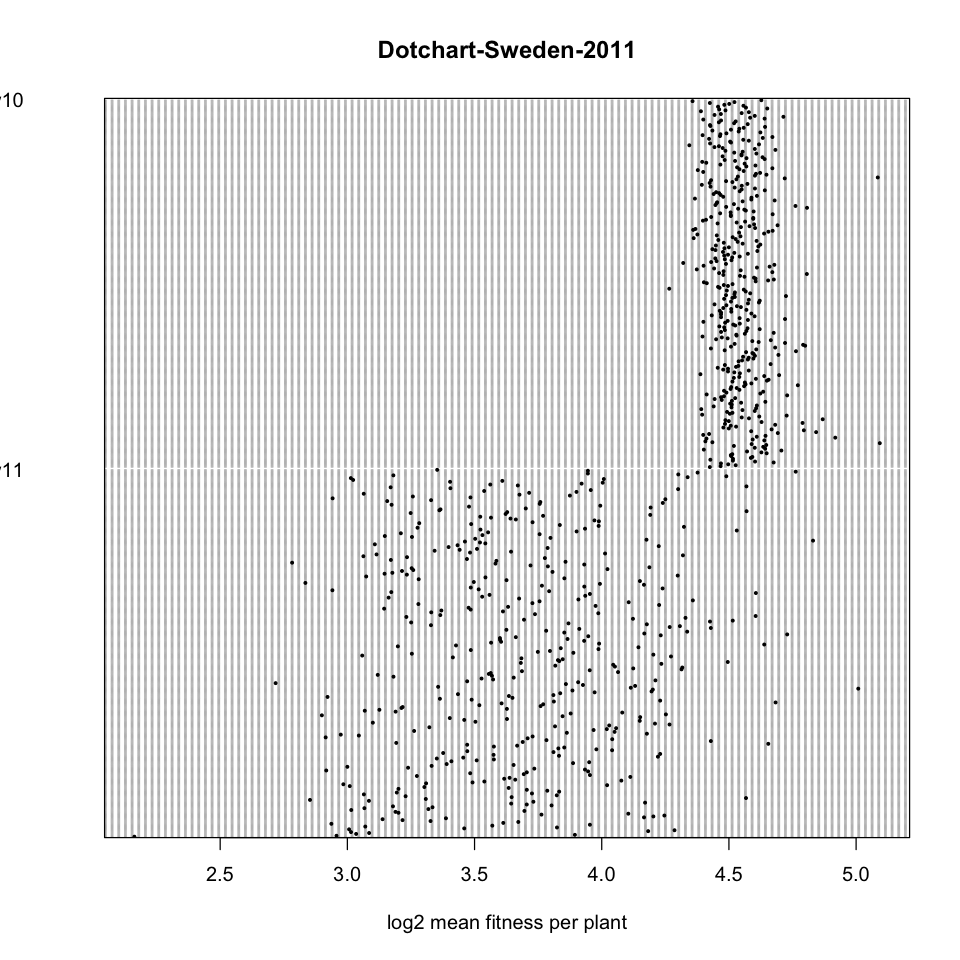

In [12]:
dotchart(as.matrix(log2(agren[,5:6])),labels="",pt.cex=0.3,pch=19,
         main="Dotchart-Sweden-2011",
         xlab="log2 mean fitness per plant")

## Stripplot

The strip plot is another way of displaying individual data points and splitting by a variable of interest.  For example, if we used defaults, we could do the following.

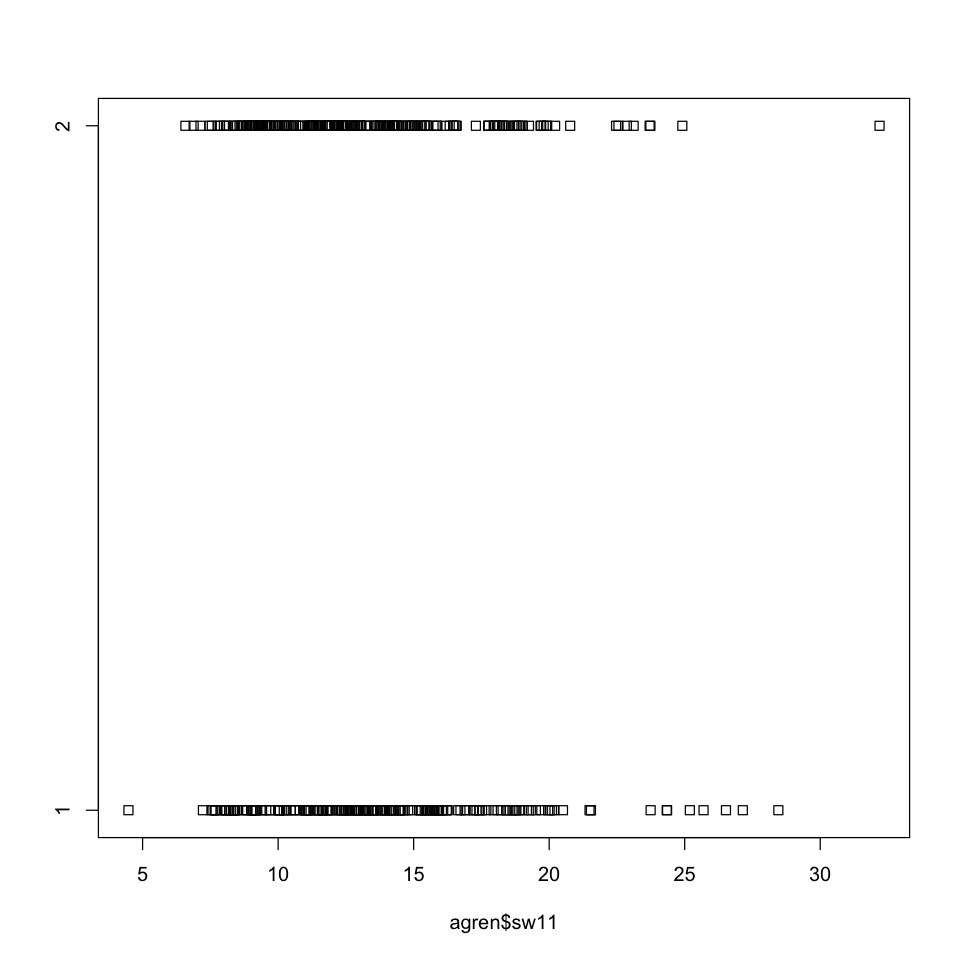

In [13]:
stripchart(agren$sw11~agren$flc)

This plot plotted the fitness in Sweden in 2011 split by FLC genotype.  However, the plot has several deficiencies.

- Several points are very close to each other and cannot be seen individually
- Generally it is better to put things we want to compare left to right (horizontally); here the comparison is vertical
- The plot title, X-axis and Y-axis labels need to be changed
- Some people might want to change the plotting character and size

We do all of that in the following plot.  Most of the options have been covered earlier; we will mention the new ones.

- We switch the X and Y axes by using the `vertical` option which plots the "strips" vertically, making the comparison horizontal for us.
- We use the option `method=jitter` to add some random jitter (or noise) so that points with the same fitness (y value) are not on top of each other (different x value).

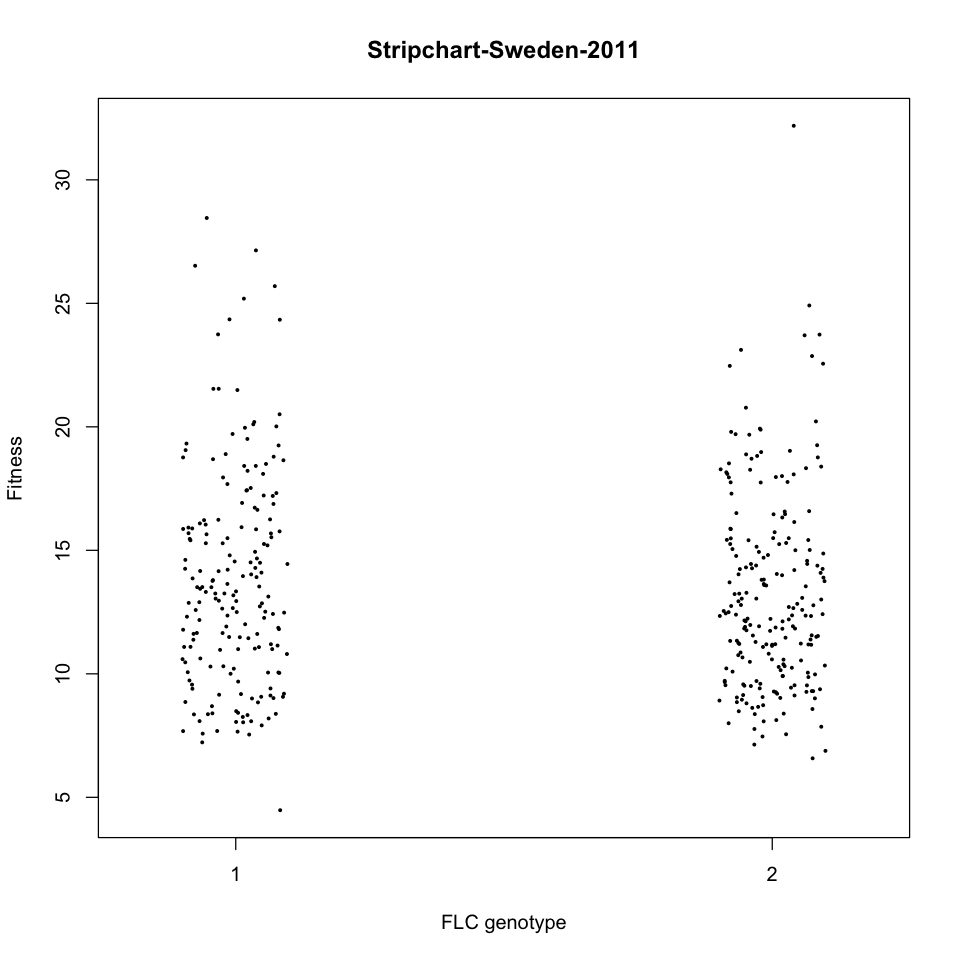

In [14]:
stripchart(agren$sw11~agren$flc,method="jitter",vertical=TRUE,pch=19,cex=0.3,
           main="Stripchart-Sweden-2011",xlab="FLC genotype",
           ylab="Fitness")

## Boxplot

Finally, the familiar boxplot.  It is not recommended for most of the situations since it tends to hide more than it shows.  It was invented in an era when graphics was done by hand.  Now, with computers it is possible to do better.  The options mentioned above, would, in most cases, be better than a boxplot.  When there are a lot of points, the boxplot might be a reasonable choice.  You may also use a violin plot.

Here is it is.  You can see immediately, that the other plots show a lot more.  The only thing the boxplot does well is to show the medians, which are a little different in the two FLC grouos.  It seems to highlight "outliers", but if one looks at the raw data, it is not clear if there are many outliers, if at all!

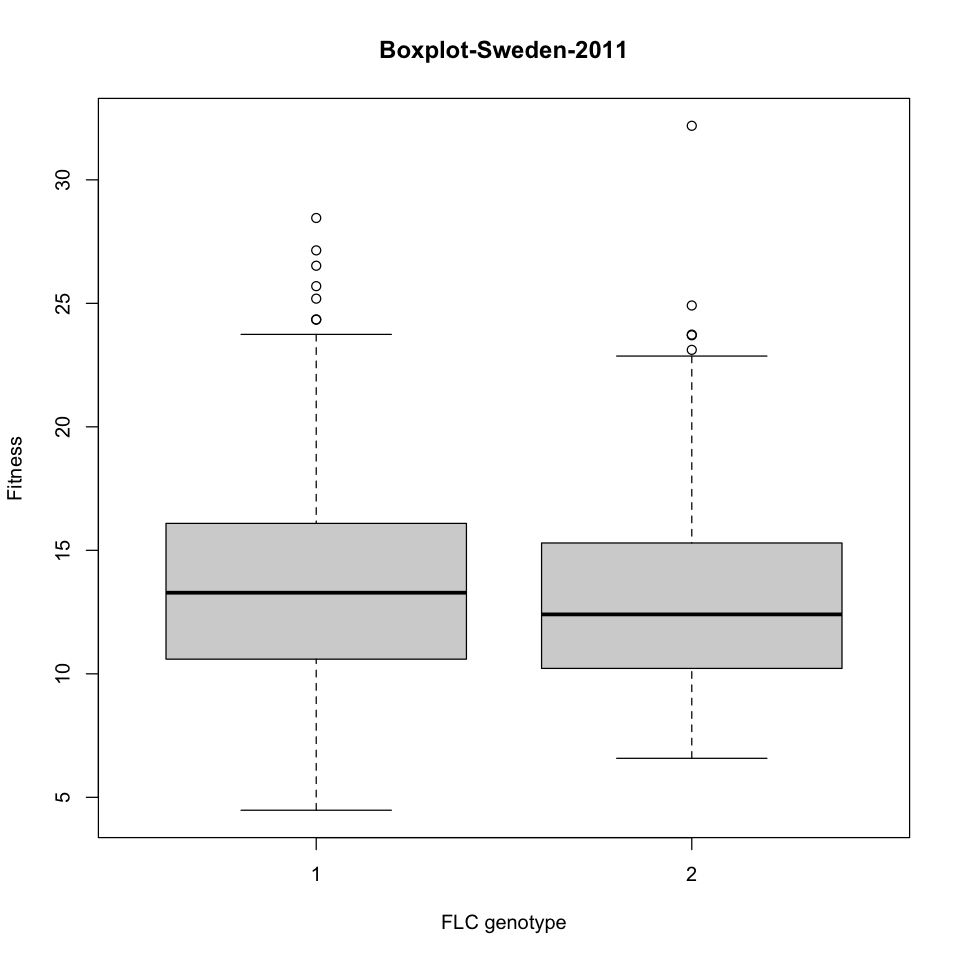

In [15]:
boxplot(agren$sw11~agren$flc,main="Boxplot-Sweden-2011",
        xlab="FLC genotype",ylab="Fitness")

Loading required package: sm

Package 'sm', version 2.2-5.6: type help(sm) for summary information

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




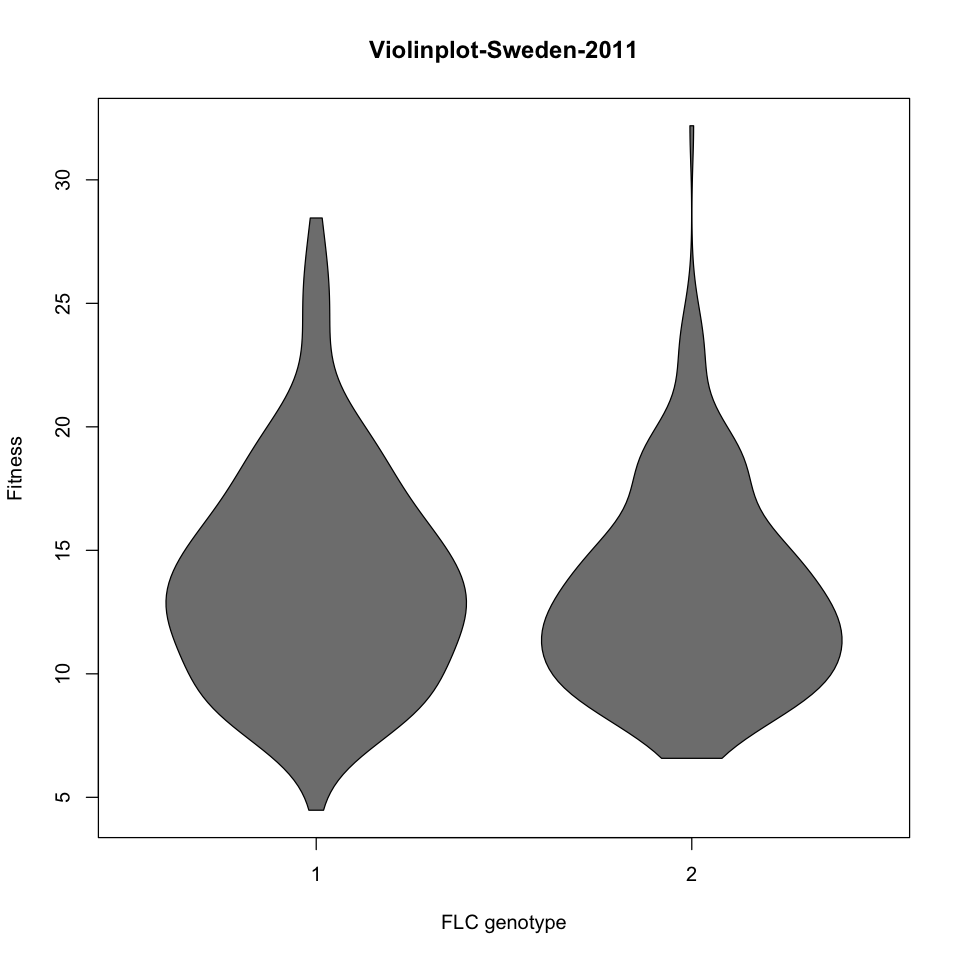

In [16]:
library(vioplot)
vioplot(split(agren$sw11,agren$flc),main="Violinplot-Sweden-2011",
        xlab="FLC genotype",ylab="Fitness",drawRect=FALSE)

This tweet says is well.

![](images/TweetSketchPlot.jpg)

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Another “sketch”.  This one from my stats class — Honest or modest?  It may not always look great, but it’s better to keep your data as honest as possible... <a href="https://t.co/3PspSPj5Cm">pic.twitter.com/3PspSPj5Cm</a></p>&mdash; Kyle Allen (@OrthoBME) <a href="https://twitter.com/OrthoBME/status/1026834526599823360?ref_src=twsrc%5Etfw">August 7, 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


## Scatterplot

Here's how to make a scatterplot.  The options are self-explanatory.

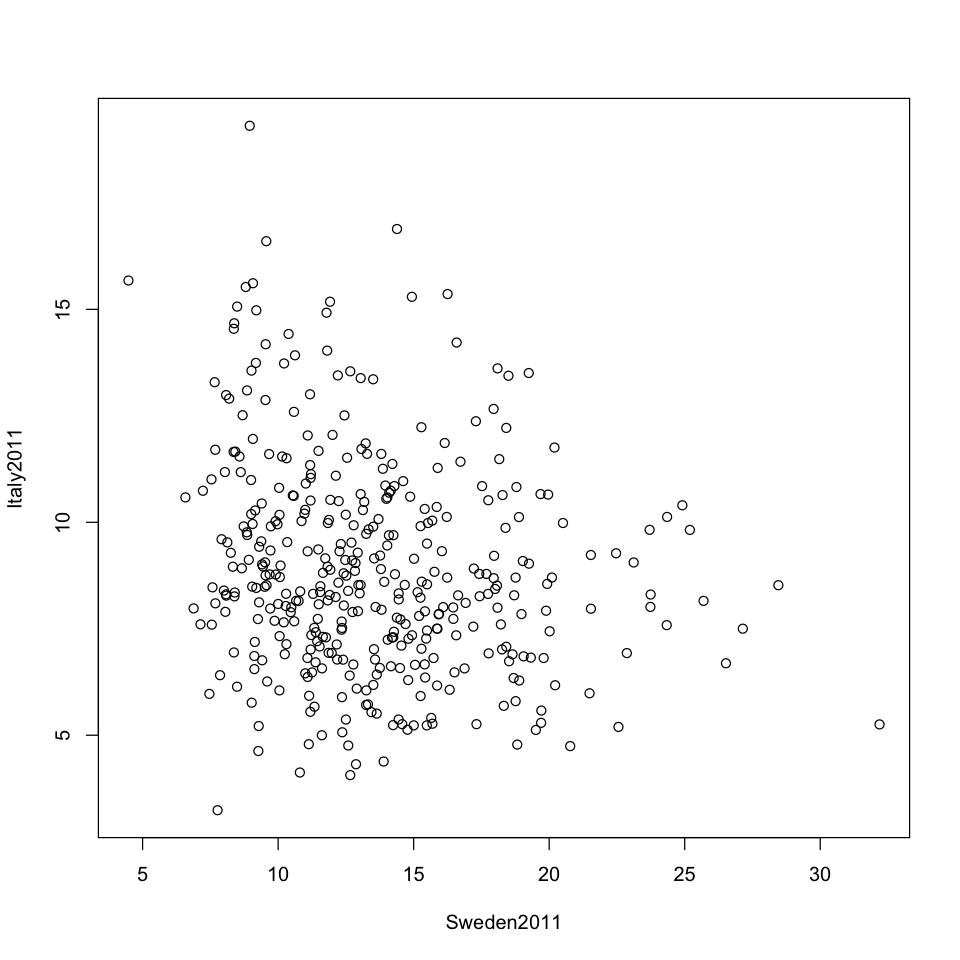

In [17]:
plot(agren$sw11,agren$it11,xlab="Sweden2011",ylab="Italy2011")

If we want to take logarithms and color the points by FLC genotype, we would do the following.  Note that it is vert similar to the `dotchart` syntax we used earlier.

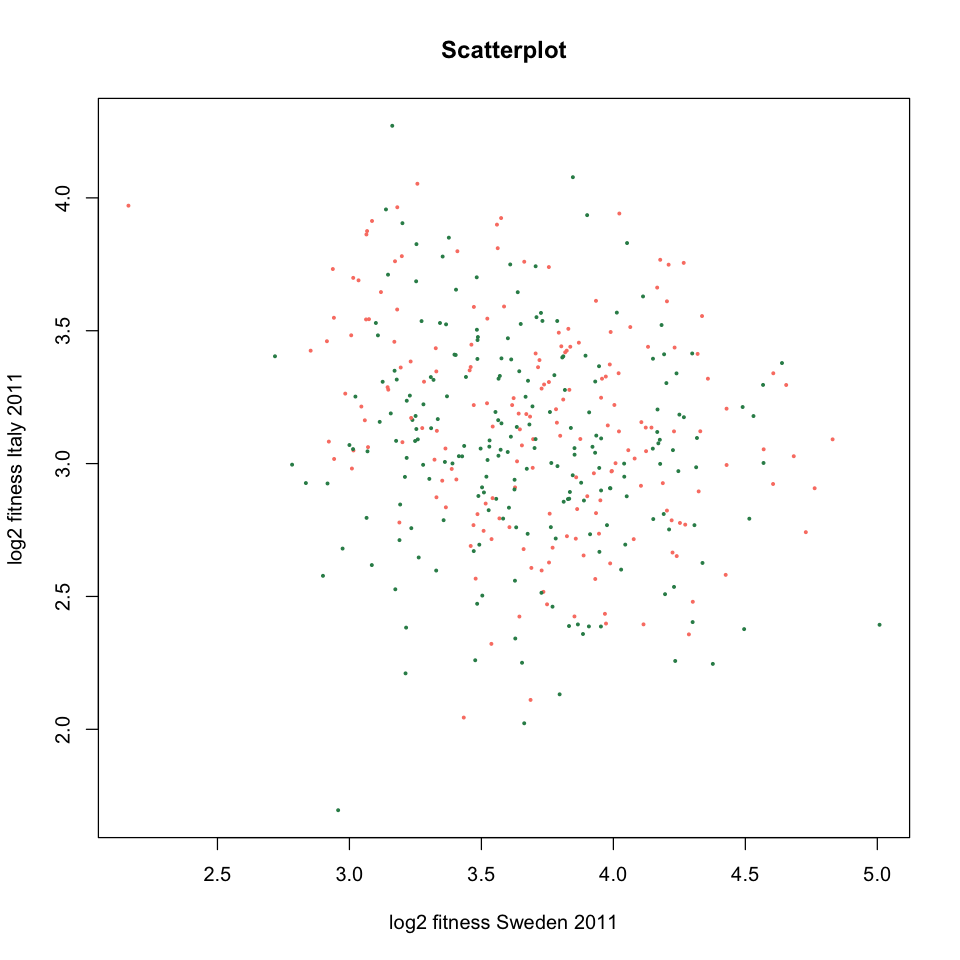

In [18]:
plot(log2(agren$sw11),log2(agren$it11),
     col=mycolors[agren$flc],pch=19,cex=0.3,main="Scatterplot",
     xlab="log2 fitness Sweden 2011",ylab="log2 fitness Italy 2011")

## Plots for categorical data

Now, let's look at some options for categorical data.  Often, a table works quite well.  

In [19]:
table(agren$flc)


  1   2 
186 214 

Sometimes, a visual is better.  For example, we could simply make a histogram of the FLC genotype.

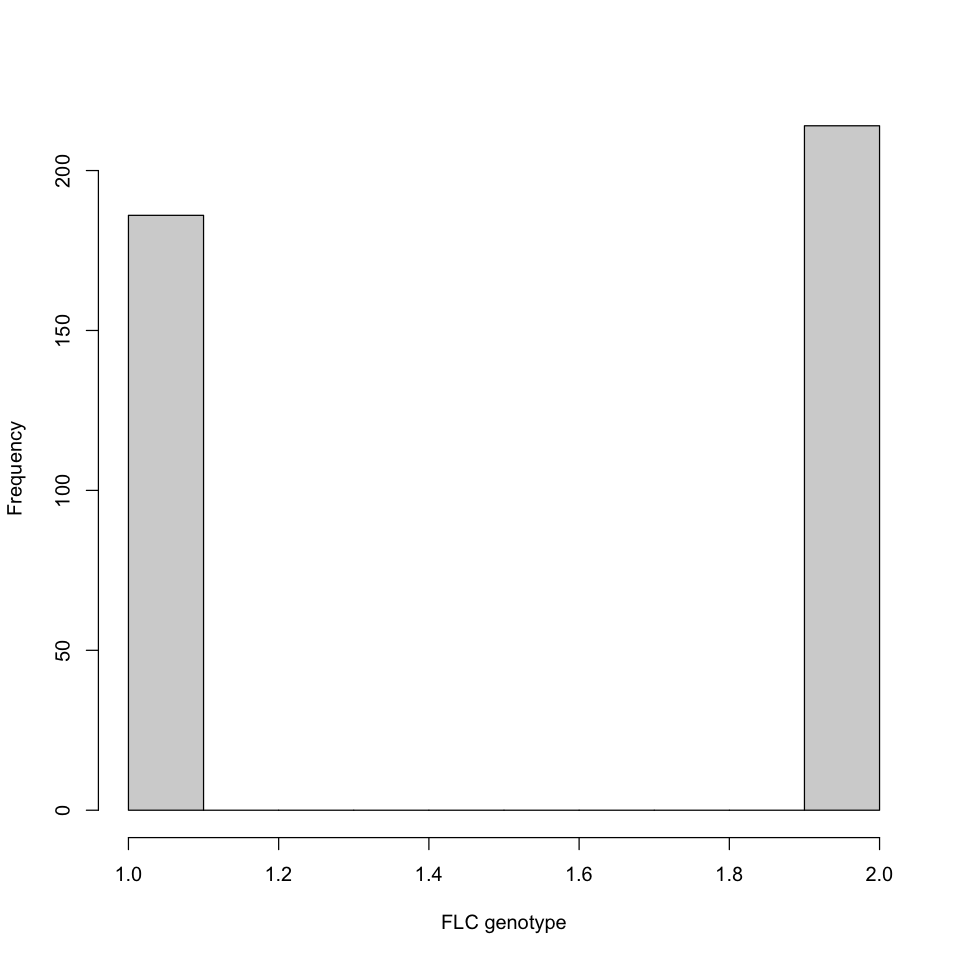

In [20]:
hist(agren$flc,xlab="FLC genotype",main="")

You can also make a mosaic plot, which makes rectangles proportional to the frequency of the entries in a table.

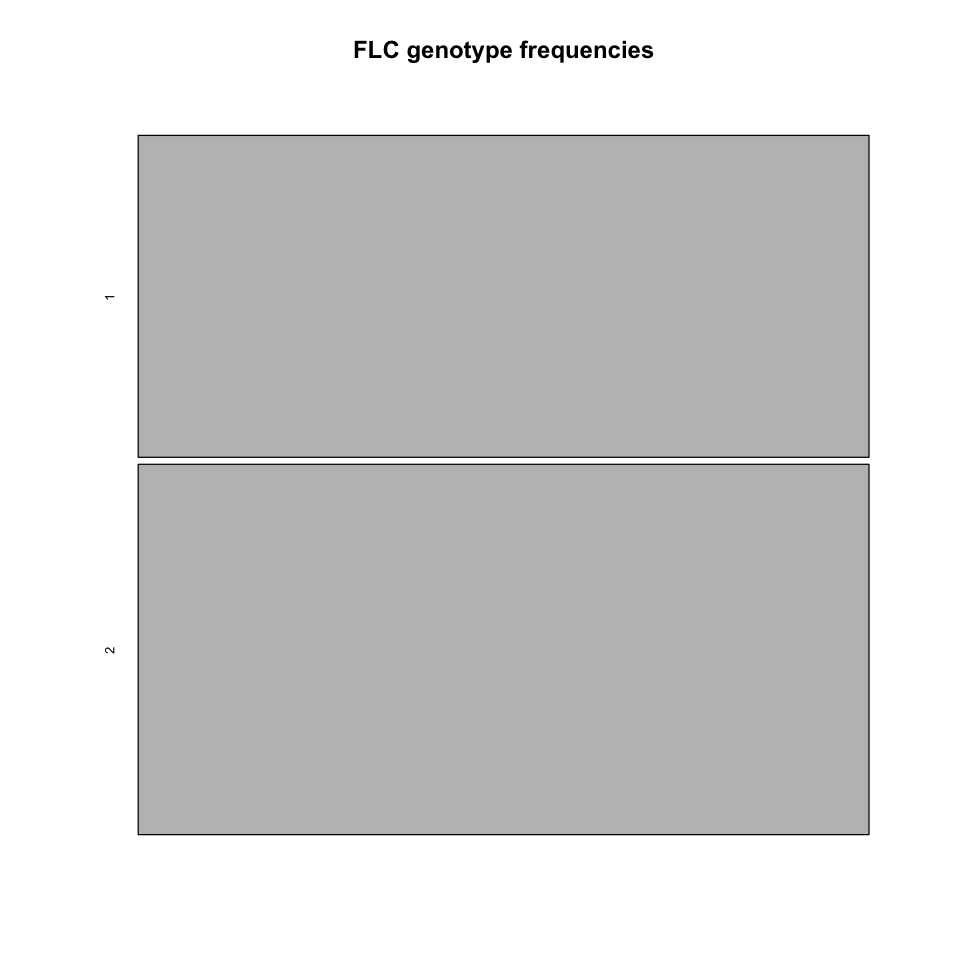

In [21]:
# dir="h" means the main factor being tabled is horizontal
# off=1 means that the gap between the two rectangles is 1%
mosaicplot(table(agren$flc),dir="h",off=1,main="FLC genotype frequencies")

In the above example, FLC genotype was quantitative.  Let's look at the soccer data as the data is more obviously categorical there.

In [22]:
soccerURL <- "https://raw.githubusercontent.com/sens/smalldata/master/soccer/E0.csv"
# read in data
epl <- read.csv(soccerURL)

We can plot the  table of full-time results (`FTR`) as follows.  Note that we changed the X and Y axis labels.

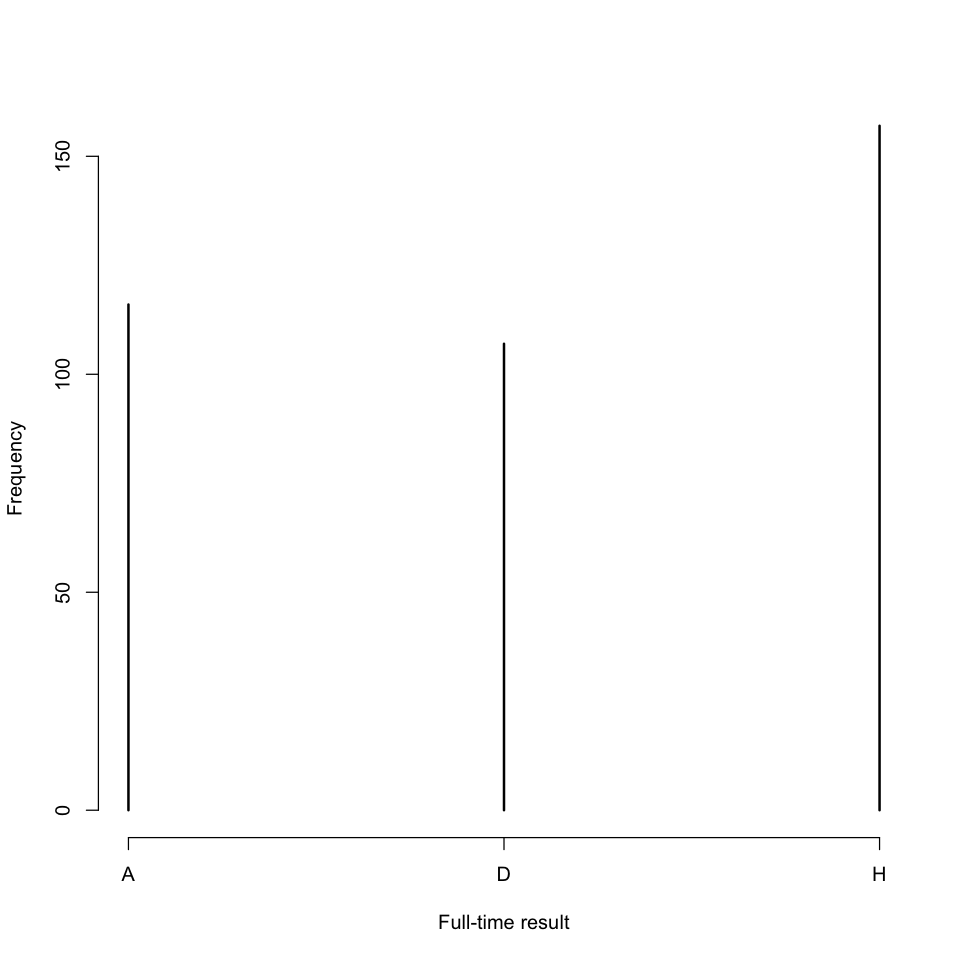

In [23]:
plot(table(epl$FTR),ylab="Frequency",xlab="Full-time result")

To plots two categorical variables against each other, we have to use a mosaic plot.  That is the default if we plot a two-dimensional table.  We use the `dnn` option to label the dimensions of the table.

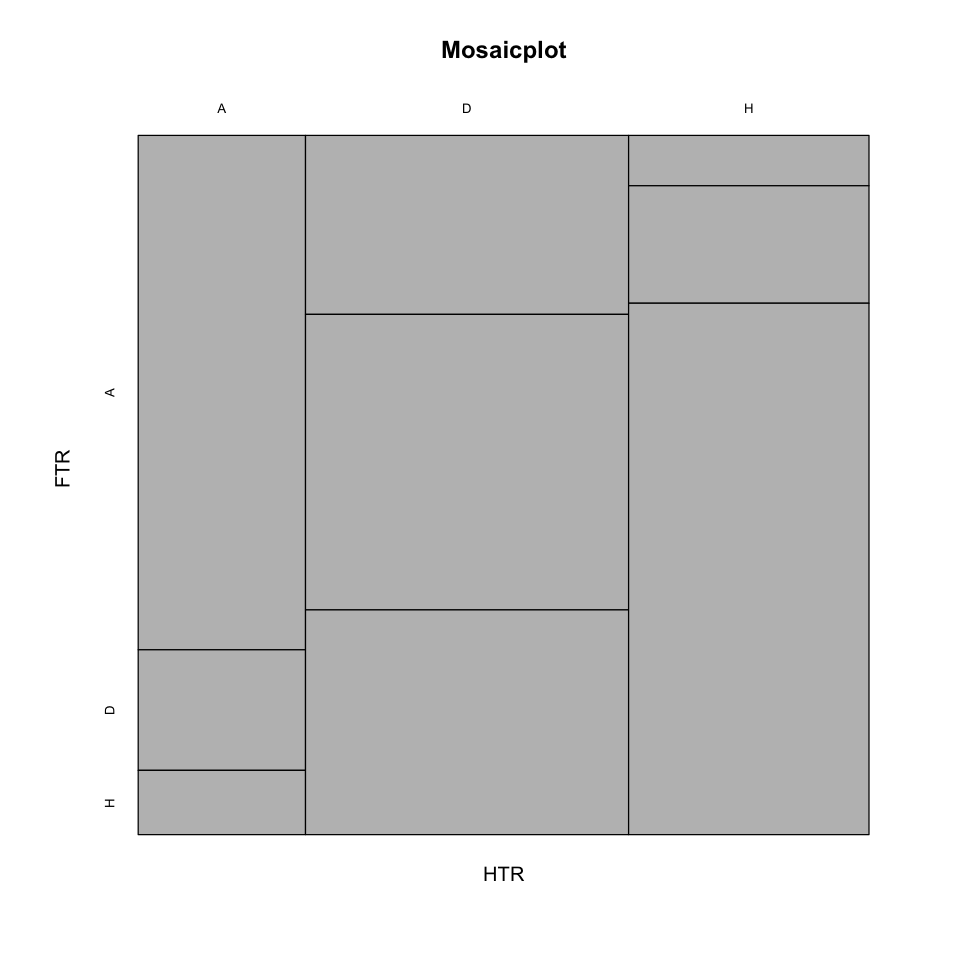

In [24]:
plot(table(epl$HTR,epl$FTR,dnn=c("HTR","FTR")),
     main="Mosaicplot",off=0)

If we want to plot something else, like the number of full-time goals by the home team and away team, it is hepful to create new variables.

In [25]:
## full time home goals
fthg <- epl$FTHG
## full time away goals
ftag <- epl$FTAG

To facilitate categorization, we replace entries with more than 1 goals (2 or more) by the string `"2+"` as follows.

In [26]:
## replace 2 or more by "2+"
ftag[ftag>1]="2+"
fthg[fthg>1]="2+"

We can make a table of the full time home vs away goals as follows.

In [27]:
table(fthg,ftag)

    ftag
fthg  0  1 2+
  0  32 33 27
  1  37 41 43
  2+ 54 51 62

Now, can you make the mosaic plot?

Here is another example of categorical data -- this time the categories are triage status and sex, both coded as "factors" in R.

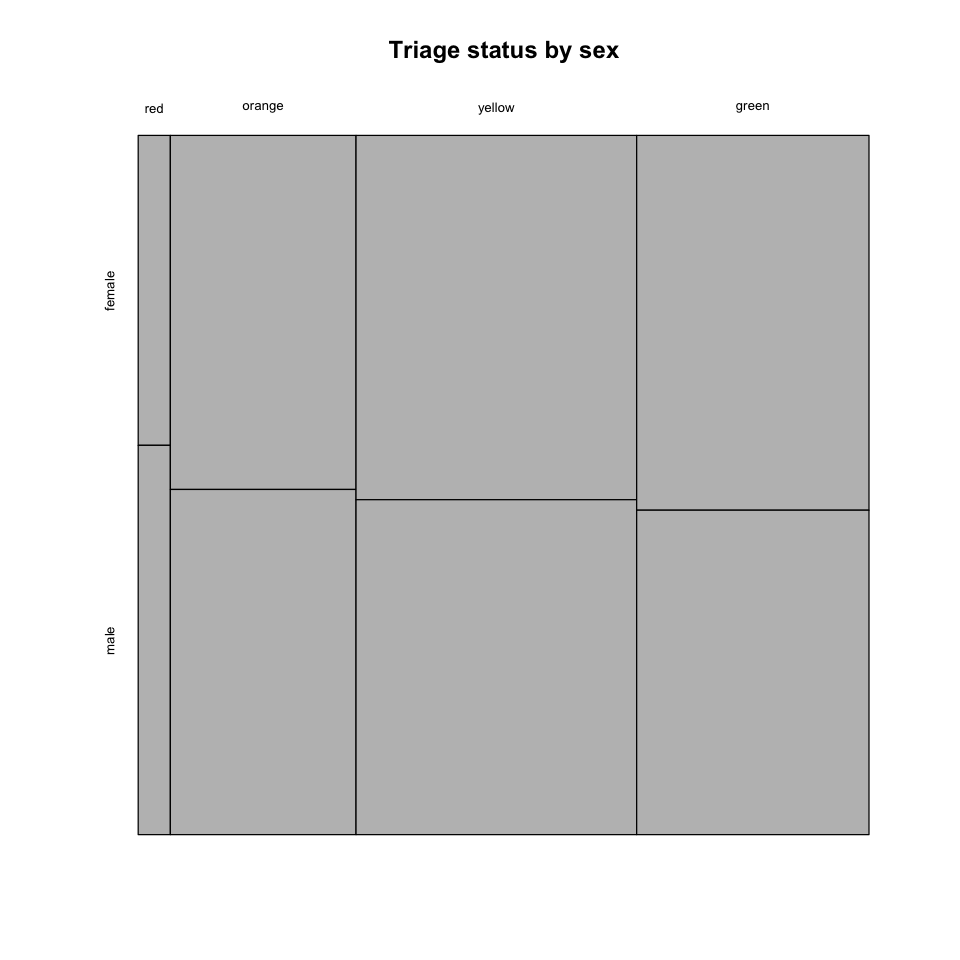

In [28]:
## make a temporaty filename with RDA extension
tmpfile <- tempfile(fileext="rda")
## download that file
## windows users may want to use the mode="wb" option
download.file("https://datadryad.org/stash/downloads/file_stream/27482",tmpfile,mode="wb")
## load it
load(tmpfile)
## assign it to a different name as it has an unhelpful name
emergency <- data
rm(data)
# head(emergency)
plot(table(emergency$triage,emergency$sex),off=0,main="Triage status by sex")

## Dynamite plots

You have all seen (probably used) dynamite plots.  [You are strongly discouraged from using them.](https://simplystatistics.org/2019/02/21/dynamite-plots-must-die/)  Your first choice should be to display all the points with a stripchart showing all the data.  If the number of plots is large, you should use a violin plot.  In some cases (eg, when there are many conditions), a boxplot or mean +/- standard error may be used.

- [Brief note on disadvantage of dynamite plots](http://biostat.mc.vanderbilt.edu/wiki/Main/DynamitePlots)
- [Longer, more nuanced note on their use](http://emdbolker.wikidot.com/blog:dynamite)

## Understanding plots in R

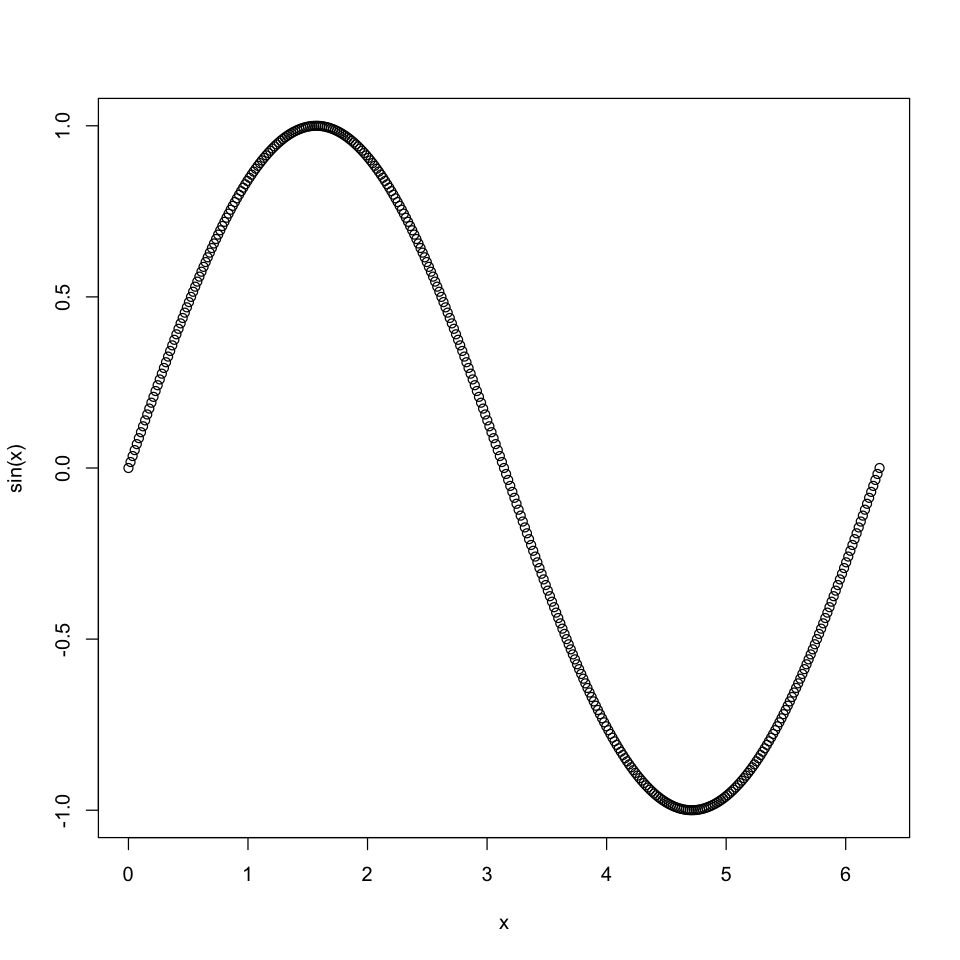

In [29]:
x <- pi*(0:360)/180
plot(x,sin(x))

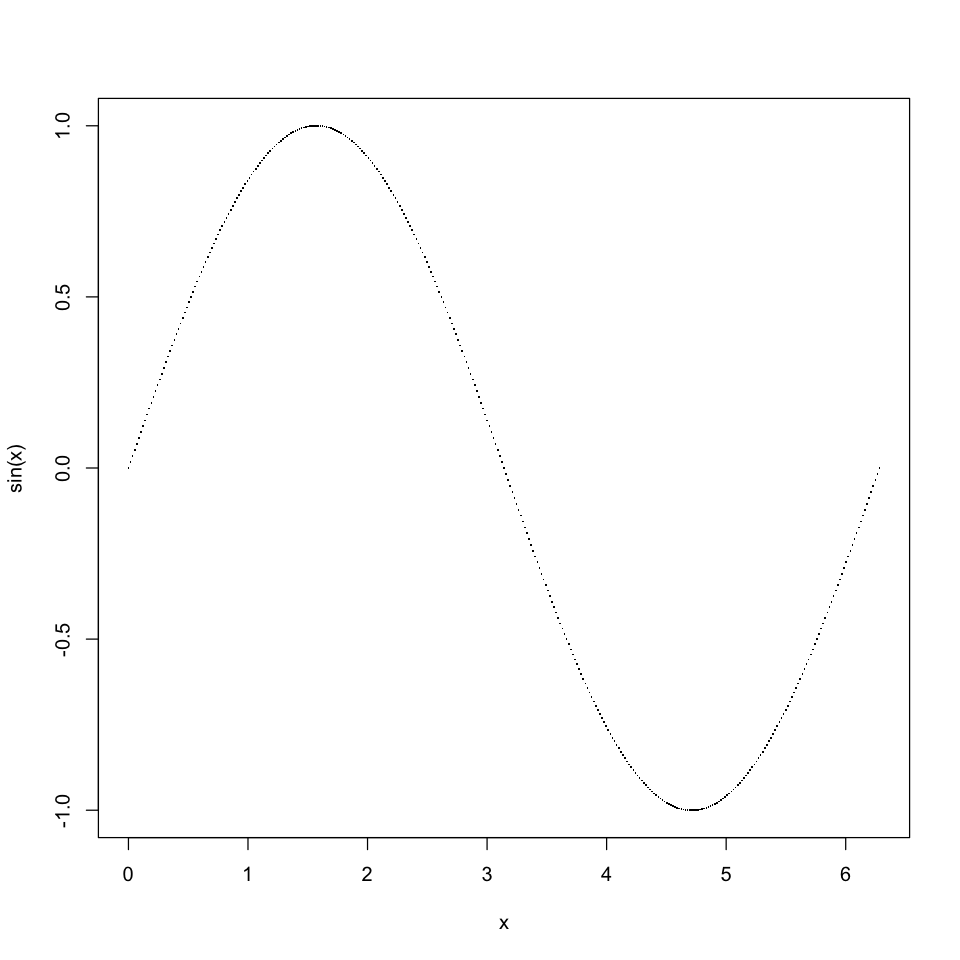

In [30]:
plot(x,sin(x),pch=".")

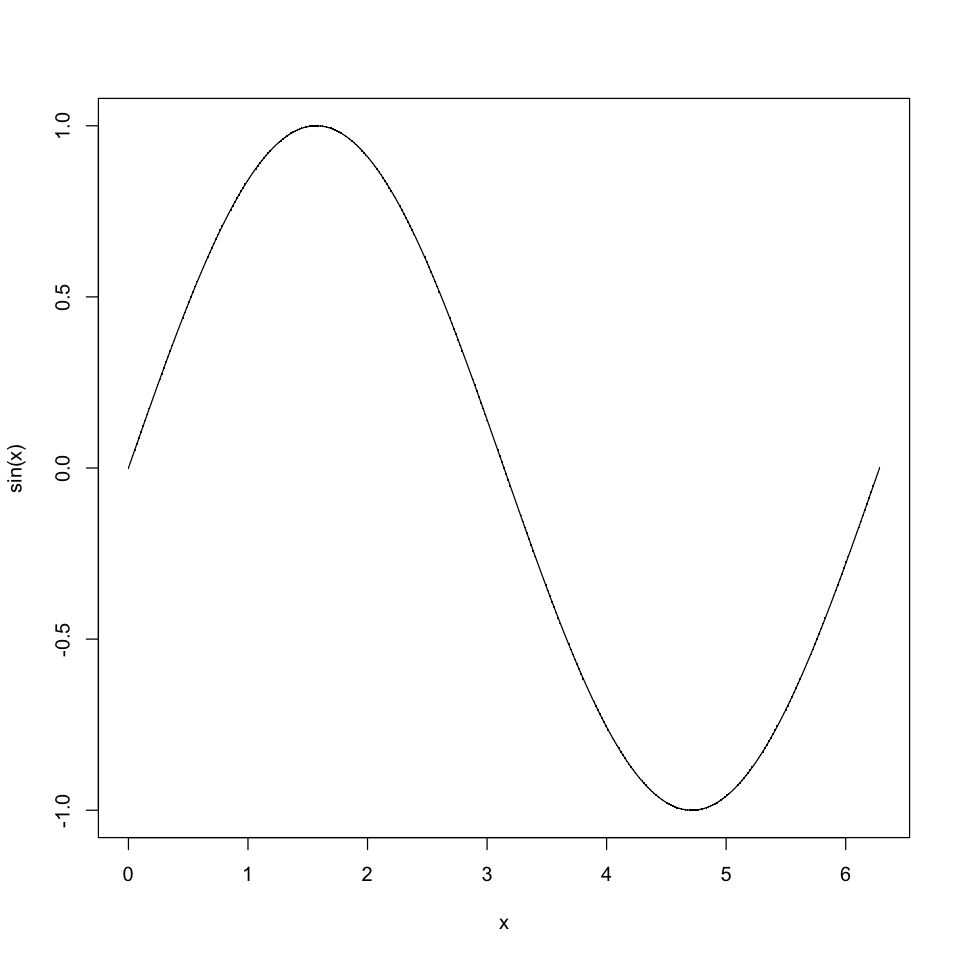

In [31]:
plot(x,sin(x),pch=".")
lines(x,sin(x))

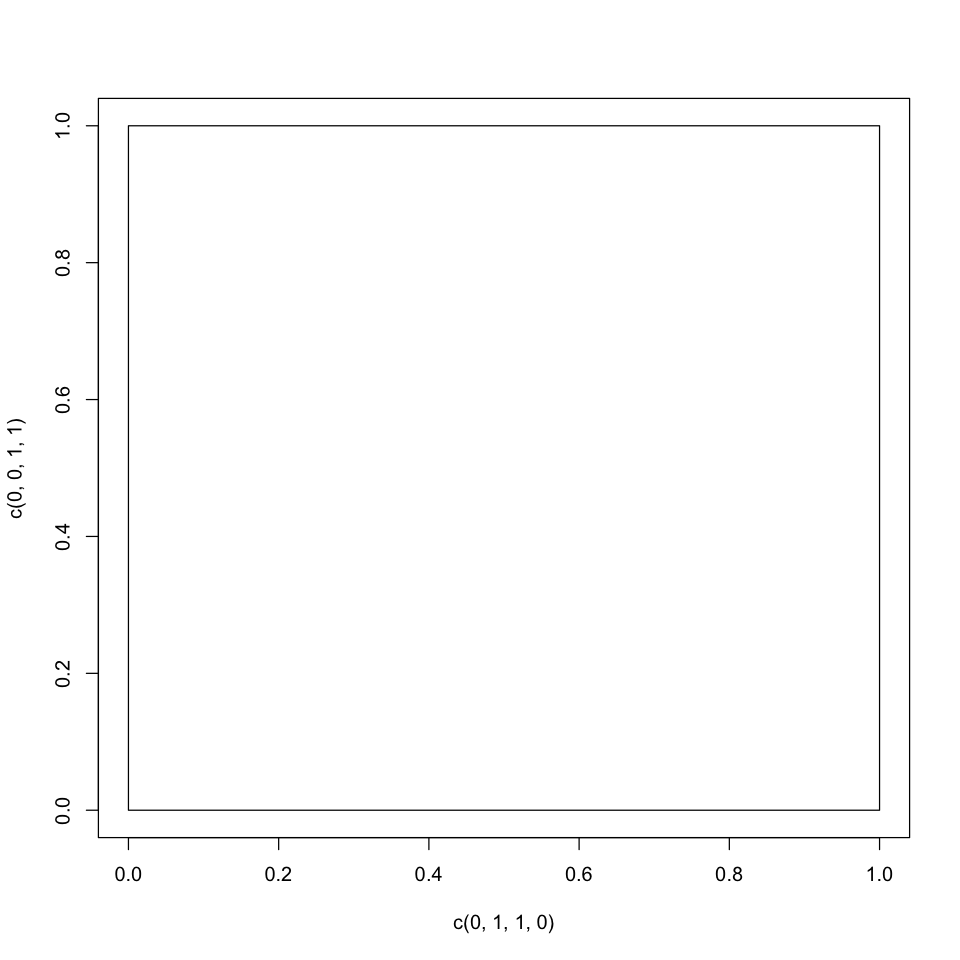

In [32]:
plot(c(0,1,1,0),c(0,0,1,1),type="n")
polygon(c(0,1,1,0),c(0,0,1,1))

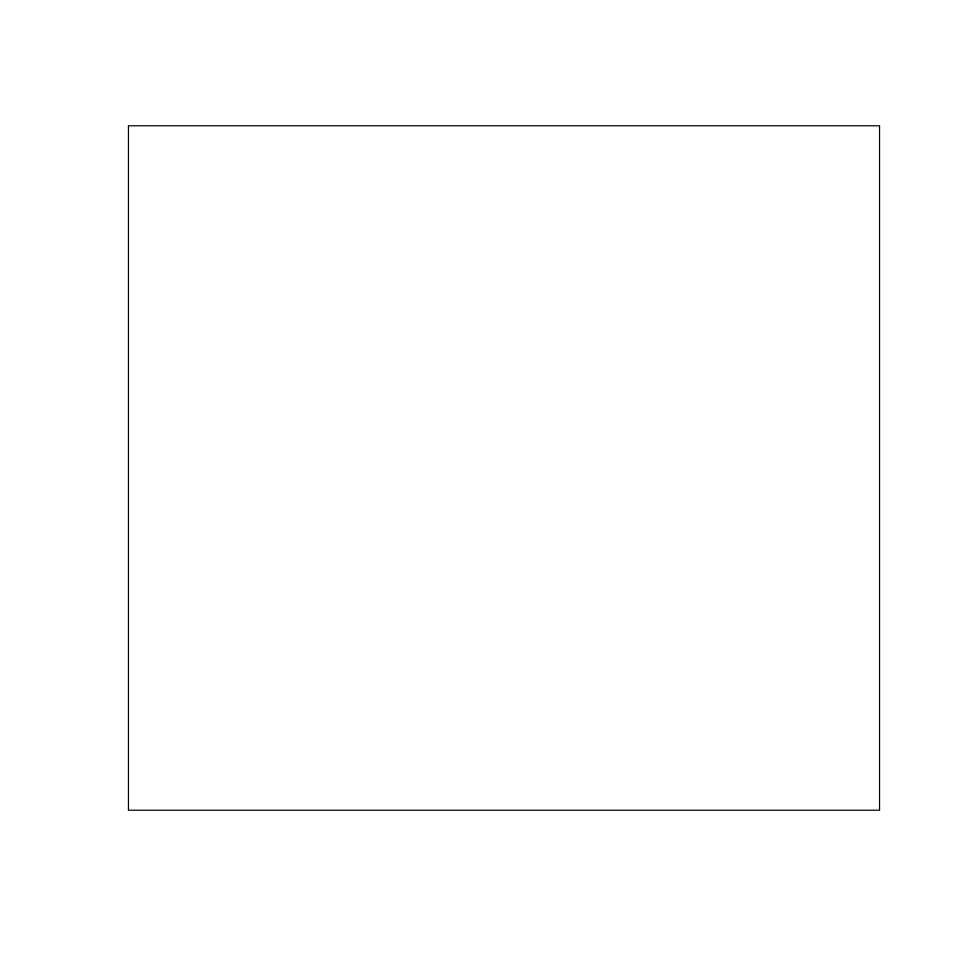

In [33]:
plot(c(0,1,1,0),c(0,0,1,1),type="n",axes=F,xlab="",ylab="")
polygon(c(0,1,1,0),c(0,0,1,1))

## Saving plots to files

You can always save a plot using the GUI, but it is useful to know how to do
that in a script.  If you have many plots to make, you can automate that process.

The most common formats are PDF, BMP, JPEG, PNG, and TIFF files.  For each of 
these cases you will first open a "device" for the appropriate file format.
Then put in your graphics statements, and the make the file by closing the device.

For example, to save the above plot as a PNG file, you would do the following.

In [34]:
png(file="square.png")
plot(c(0,1,1,0),c(0,0,1,1),type="n",axes=F,xlab="",ylab="")
polygon(c(0,1,1,0),c(0,0,1,1))
dev.off()

pdf 
  2

![Square image](square.png)

Look at the help of the functions to set other options such as pixel width, etc.

## Default plot options

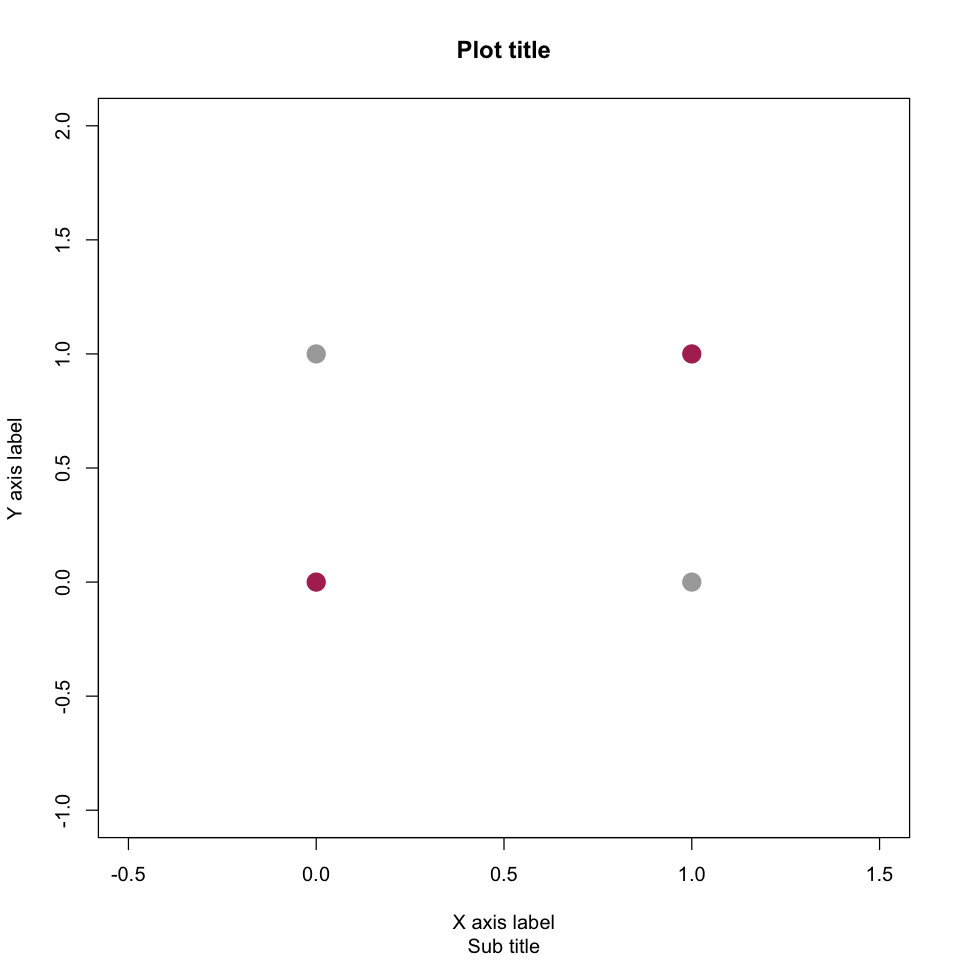

In [35]:
par(mar=c(5,4,4,2)+0.1) # default margin: bottom, left, top, right

plot(x=c(0,1,1,0), # x-values of points to be plotted
     y=c(0,0,1,1), # y-values of points to be plotted
     type="p", , # type of plot: points, lines, both, etc.
     main="Plot title", # title of plot (at top)
     sub="Sub title", # subtitle of plot (at bottom)
     xlab="X axis label", # x axis label
     ylab="Y axis label", # y axis label
     cex=2, # size of plotting character relative to default=1
     pch=19, # type of plotting character
     col=c("maroon","darkgrey"), # color of plotting character/lines, recycled
     xlim=c(-0.5,1.5), # limits of X axis
     ylim=c(-1.0,2.0), # limits of Y axis   
     ) 

You will use `par` to set options for subsequent figures.  The default `plot` function is the mother of all plot functions in that it is the foundation on which other plotting functions are built on.  It is like drawing, and you have to specify exactly how the drawing is to be done. 